In [1]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import cm
import numpy as np

In [21]:
# parameters cell
meshpath = "/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/"
abg = [50, 15, -90]

input_paths = [
    "/Users/nkolduno/PYTHON/DATA/output_7_10",
]
input_names = [ 'opt1']
years = range(1978, 1986)

reference_path = "/Users/nkolduno/PYTHON/DATA/output_7_8/"
reference_name = 'control'
reference_years = years

figsize=(10, 5)
region = "Global Ocean"
levels = [-5, 5, 41]
ofile = None

In [22]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [23]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2


In [25]:
xmoc = OrderedDict()
mask = pf.get_mask(mesh, region)

data_reference = pf.get_data(reference_path, 'w', reference_years, mesh, how='mean', compute=True, silent=True)
lats, xmoc_reference = pf.xmoc_data(mesh, data_reference, mask = mask)

for exp_path, exp_name  in zip(input_paths, input_names):
    data = pf.get_data(exp_path, 'w', years, mesh, how='mean', compute=True, silent=True)
    title = exp_name+" - "+reference_name
    xmoc[title] = {}
    lats, xmoc_exp = pf.xmoc_data(mesh, data, mask = mask)
    
    data_difference = xmoc_exp.data - xmoc_reference.data
    xmoc[title]['data'] = data_difference
    xmoc[title]['lats'] = lats
    if (data_difference.max() == data_difference.min() == 0):
        xmoc[title]['nodiff'] = True
    else:
        xmoc[title]['nodiff'] = False
    del data
    print(exp_name)

opt1


In [26]:
def data_to_plot(xmoc):
    plot_data = []
    plot_names = []
    for key, value in xmoc.items():
        if value['nodiff'] is False:
            plot_data.append(value['data'])
            plot_names.append(key)
                
    return plot_data, plot_names

In [27]:
plot_data, plot_names = data_to_plot(xmoc)
if not plot_data:
    print('There is no difference between fields')
    identical = True
else:
    identical = False

if len(plot_data) == 1:
    plot_data = plot_data[0]
    plot_names = plot_names[0]

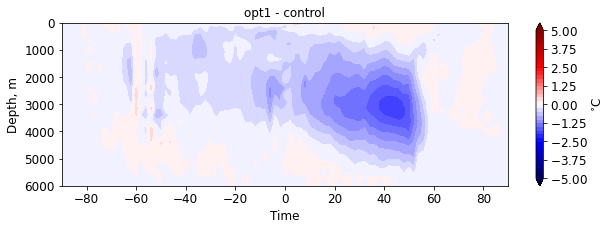

In [29]:
plt.figure(figsize=figsize)
pf.plot_xyz(mesh, plot_data, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = levels, title=plot_names,
             facecolor='gray', ncols = columns)
if ofile is not None:
    plt.savefig(ofile)
    os.system(f'convert {ofile} -trim {ofile}_trimmed.png')
    os.system(f'mv {ofile}_trimmed.png {ofile}')